<a href="https://colab.research.google.com/github/kelvinfoo123/MH3510-Regression-Analysis/blob/main/Practising_regression_with_statsmodels_OLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split 
from sklearn import preprocessing, metrics 
from sklearn.linear_model import LinearRegression 

import statsmodels.api as sm 
from scipy import stats 

In [31]:
data = pd.read_csv("Airbnb.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
print('The shape of the data is ', data.shape)

The shape of the data is  (48895, 16)


In [6]:
data.isnull().sum()

# Columns with null values are not important in building the regression model. We can ignore them.

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [32]:
data.drop(columns = ['name', 'host_name', 'last_review', 'reviews_per_month'], inplace = True)
data.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## **Exploratory data analysis**

In [10]:
# Summary of price column 
data['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Average price is 152 with prices reaching as high as 10 000. 

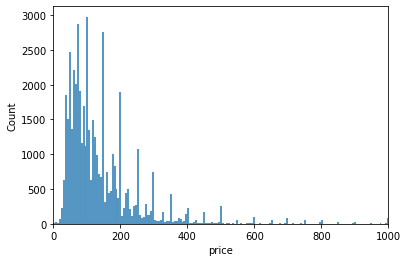

In [13]:
sns.histplot(x = 'price', data = data)
plt.xlim([0,1000])
plt.show()

Most listings have prices less than $1000. 

We treat houses that are above $1000 as outliers and drop them from the data.

In [33]:
data = data[data['price'] < 1000]

In [16]:
data['neighbourhood'].value_counts()

Williamsburg          3908
Bedford-Stuyvesant    3701
Harlem                2650
Bushwick              2463
Hell's Kitchen        1948
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

There are 221 unique neighborhoods with Williamsburg having the most listings. 

In [17]:
data['neighbourhood_group'].value_counts()

Manhattan        21448
Brooklyn         20037
Queens            5653
Bronx             1089
Staten Island      370
Name: neighbourhood_group, dtype: int64

In [18]:
# Average pricing by neighborhood group 
mean_price = data.groupby('neighbourhood_group')['price'].mean()
mean_price

neighbourhood_group
Bronx             84.443526
Brooklyn         117.235564
Manhattan        177.366747
Queens            94.528038
Staten Island     96.148649
Name: price, dtype: float64

Manhattan is the most expensive to live in. 

In [19]:
data['room_type'].value_counts()

Entire home/apt    25166
Private room       22275
Shared room         1156
Name: room_type, dtype: int64

In [20]:
mean_price = data.groupby('room_type')['price'].mean()
mean_price 

room_type
Entire home/apt    192.932806
Private room        84.555196
Shared room         66.001730
Name: price, dtype: float64

In [34]:
data.drop(["latitude",'longitude', 'id', 'host_id'], axis=1, inplace=True)

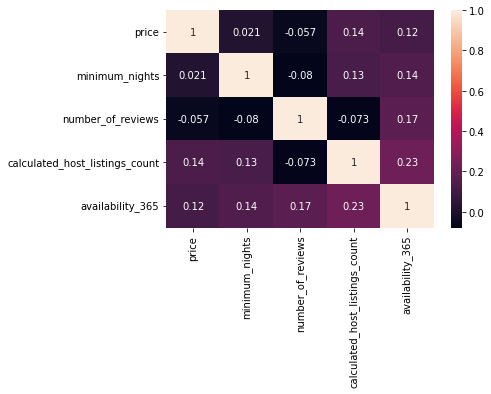

In [22]:
sns.heatmap(data.corr(), annot = True)

## **Data preparation**

In [35]:
# Convert categorical variables to numeric 
data = pd.get_dummies(data, columns = ['neighbourhood_group', 'room_type'])

In [36]:
# Due to the large number of values in neighborhood, we drop it instead of converting it to a numeric variable. 
data.drop(['neighbourhood'], axis = 1, inplace = True)

In [25]:
data.head()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,149,1,9,6,365,0,1,0,0,0,0,1,0
1,225,1,45,2,355,0,0,1,0,0,1,0,0
2,150,3,0,1,365,0,0,1,0,0,0,1,0
3,89,1,270,1,194,0,1,0,0,0,1,0,0
4,80,10,9,1,0,0,0,1,0,0,1,0,0


In [37]:
X = data.loc[:, data.columns != 'price']
y = data['price']

# Splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## **Regression model**

In [38]:
lr = LinearRegression()
reg = lr.fit(X_train, y_train)

In [40]:
y_pred = reg.predict(X_test)

# RMSE for evaluation 
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse 

89.64717516404764

In [42]:
X2 = sm.add_constant(X_train)
model1 = sm.OLS(y_train, X2)
model2 = model1.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     1731.
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        04:04:09   Log-Likelihood:            -2.3214e+05
No. Observations:               38877   AIC:                         4.643e+05
Df Residuals:                   38866   BIC:                         4.644e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


neighbourhood_group_Queens is not significant. We drop it. 

In [43]:
X_train.drop(['neighbourhood_group_Queens'], axis = 1, inplace = True)
X2 = sm.add_constant(X_train)
model = sm.OLS(y_train, X2)
model2 = model.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     1731.
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        04:08:15   Log-Likelihood:            -2.3214e+05
No. Observations:               38877   AIC:                         4.643e+05
Df Residuals:                   38866   BIC:                         4.644e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


All variables are significant now but the adjusted R-squared has not increased. 

The independent variables can explain 30 % of variations in price. 